In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import plot_tree
import pickle
from sklearn.model_selection import GridSearchCV

In [2]:
# Load data from CSV
df = pd.read_csv("Churn_Modelling.csv")

#Display the CSV
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Define the features and target variables
X = df.drop(["Exited", "CustomerId","Surname","RowNumber","Geography","Gender"], axis=1)
y = df["Exited"]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Define the hyperparameters to tune
param_grid = {'max_depth': [3, 4, 5, 6, 7],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': [2, 3, 4, 5, 6]}

# Create the grid search object
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

# Fit the grid search object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [6]:
# Define the feature names
feature_names = list(X_train.columns)

In [7]:
# Create the Decision Tree Classifier model and fit it to the training data
dtc = DecisionTreeClassifier(random_state=42, max_depth=5, max_features=6, min_samples_leaf=1, min_samples_split=6)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_features=6, min_samples_split=6,
                       random_state=42)

In [8]:
# Get the feature importances
importances = dtc.feature_importances_

# Print the feature importances
for feature, importance in zip(X.columns, importances):
    print(feature, importance)

CreditScore 0.006651385525664772
Age 0.39006425710314513
Tenure 0.003329784458173485
Balance 0.02528533829801279
NumOfProducts 0.4038532105306185
HasCrCard 0.0
IsActiveMember 0.16366981584863188
EstimatedSalary 0.007146208235753454


In [9]:
# Serialize the model object using pickle
with open('dtc_modelNSHP.pkl', 'wb') as file:
    pickle.dump(dtc, file)

# Load the saved model object
with open('dtc_modelNSHP.pkl', 'rb') as file:
    dtc_loaded = pickle.load(file)

In [10]:
# Predict the target variable for the test data
y_pred = dtc.predict(X_test)

In [11]:
# Pass the feature names to the predict() method
test_data_with_names = pd.DataFrame(X_test, columns=feature_names)
predictions_with_names = dtc.predict(test_data_with_names)

In [12]:
# Print the predictions
print(predictions_with_names)

[0 0 0 ... 1 0 0]


In [13]:
# Print the confusion matrix and classification report for the model's performance on the test data
cm = confusion_matrix(y_test, predictions_with_names)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[1559   48]
 [ 234  159]]


In [14]:
# Print the confusion matrix and classification report for the model's performance on the test data
print("\nClassification Report:\n", classification_report(y_test, predictions_with_names))


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.77      0.40      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [15]:
# Print the accuracy score for the model's performance on the test data
accuracy = accuracy_score(y_test, predictions_with_names)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 85.90%


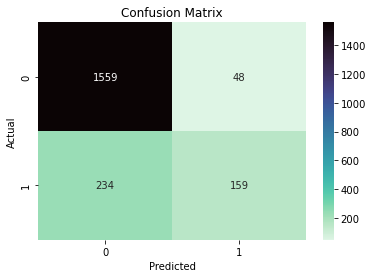

In [16]:
#Create a more visual Confusion Matrix 
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.heatmap(cm, annot=True, cmap='mako_r', fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
